In [1]:
import caffe
from google.protobuf import text_format
import heapq
import numpy as np
import PIL.Image

from IPython.display import Image

In [2]:
caffe_root = '/Development/caffe/' # substitute your path here
model_path = caffe_root+'models/bvlc_googlenet/'
net_fn   = model_path + 'deploy.prototxt'
param_fn = model_path + 'bvlc_googlenet.caffemodel'
model = caffe.io.caffe_pb2.NetParameter()
text_format.Merge(open(net_fn).read(), model)
model.force_backward = True
open('tmp.prototxt', 'w').write(str(model))

net = caffe.Classifier('tmp.prototxt', param_fn,
                       mean = np.float32([104.0, 116.0, 122.0]),
                       channel_swap = (2,1,0))

In [3]:
def encodeImg(img_file, net, d=250, end = 'pool5/7x7_s1'):
  src = net.blobs['data']
  img = PIL.Image.open(img_file)
  img = np.float32(img.resize((d, d), PIL.Image.ANTIALIAS))
  src.reshape(1,3,d,d)
  img = img.swapaxes(0, 2).swapaxes(1, 2)
  src.data[0] = img

  net.forward(end=end)
  last_hidden_layer = net.blobs[end].data[0,:,0,0]

  n = len(last_hidden_layer)
  w = int(0.02*n)
  theta = heapq.nlargest(w, last_hidden_layer)[-1]

  return set(np.where(np.asarray(last_hidden_layer) >= theta)[0])

set([588, 322, 35, 732, 425, 746, 375, 268, 141, 816, 945, 855, 19, 1013, 311, 940, 932, 972, 444, 925])


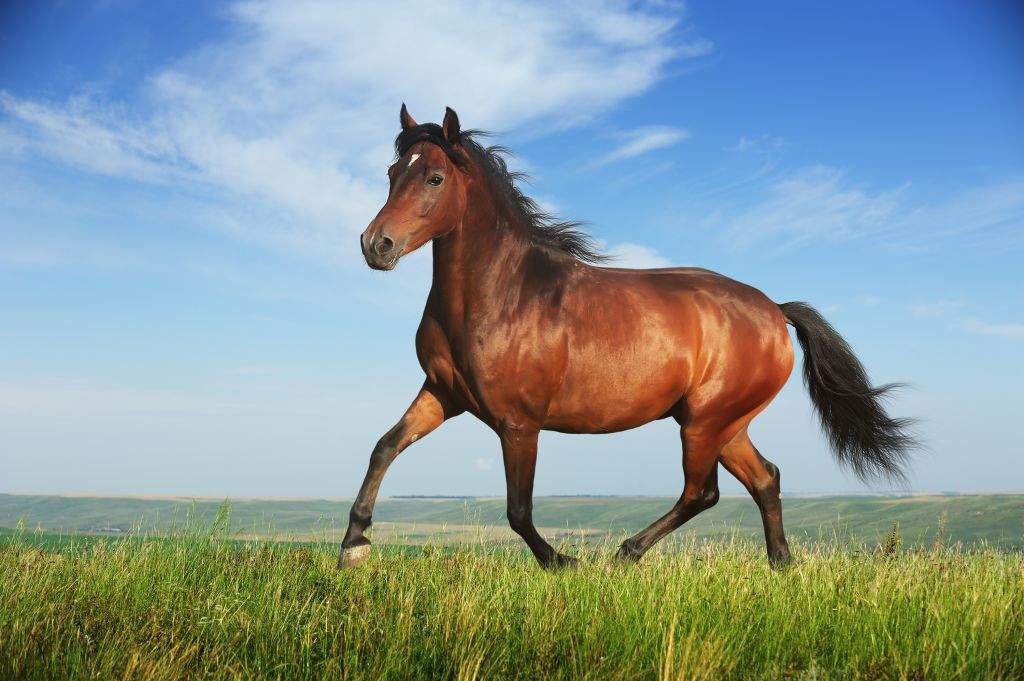

In [4]:
horse1 = encodeImg('horse1.jpg', net)
print horse1
Image(filename='horse1.jpg')

set([620, 668, 515, 425, 426, 940, 268, 973, 957, 50, 19, 660, 990, 723, 919, 954, 444, 746, 478, 671])


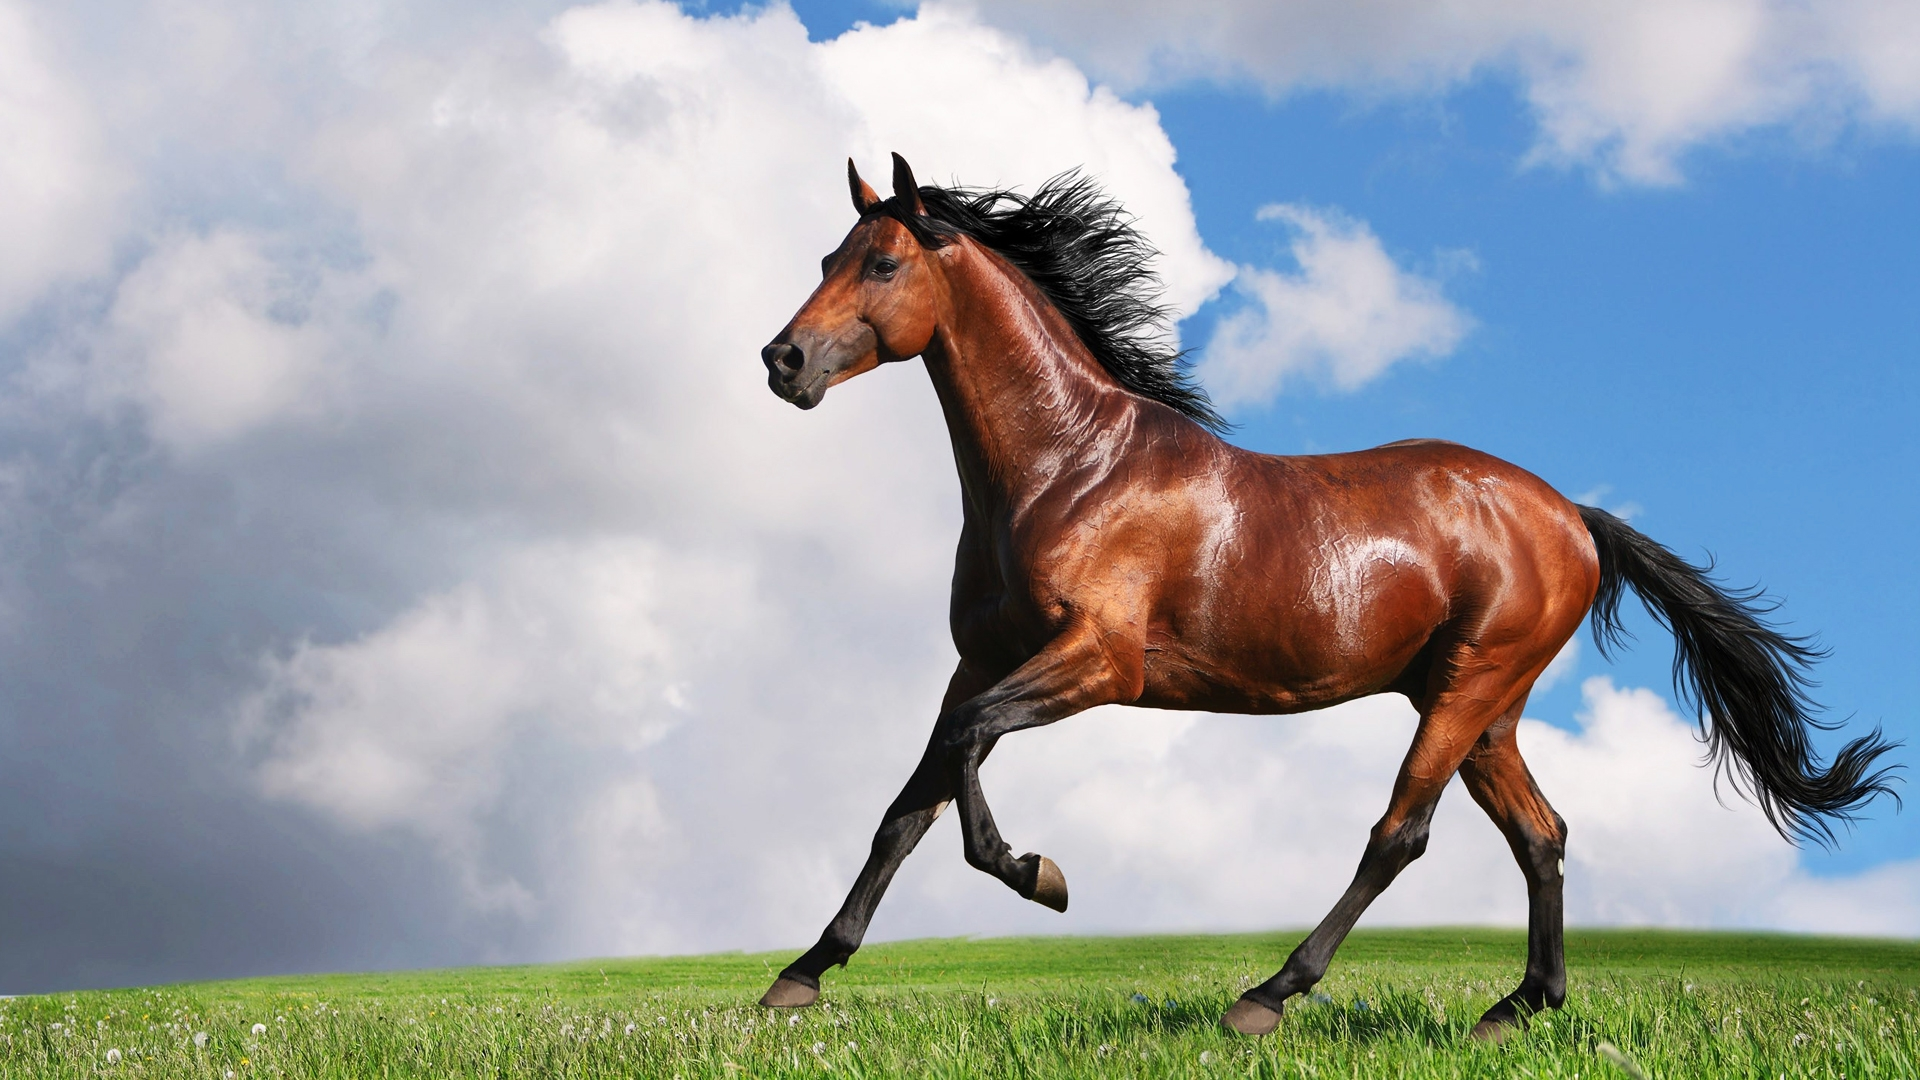

In [5]:
horse2 = encodeImg('horse2.jpg', net)
print horse2
Image(filename='horse2.jpg')

set([978, 417, 482, 899, 516, 705, 682, 684, 717, 1006, 463, 816, 536, 786, 532, 88, 539, 801, 926, 865])


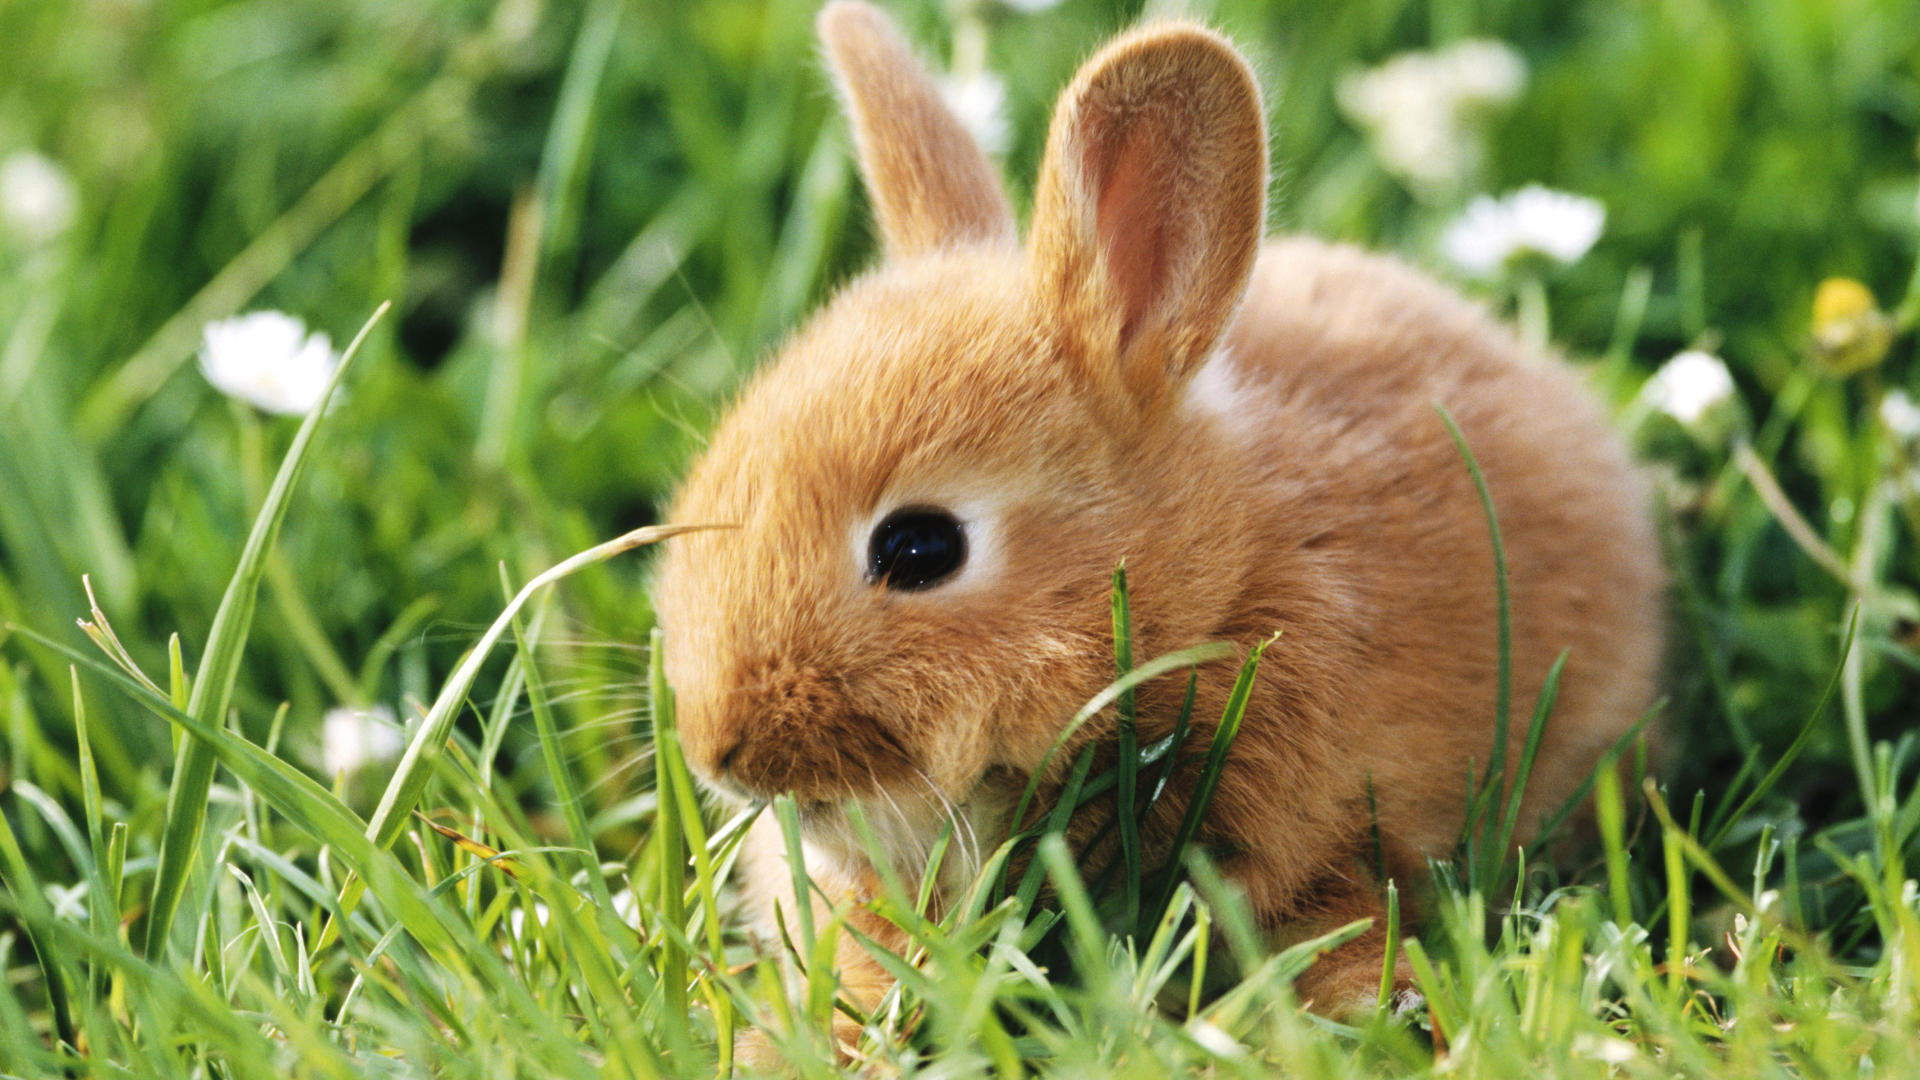

In [6]:
bunny1 = encodeImg('bunny1.jpg', net)
print bunny1
Image(filename='bunny1.jpg')

set([992, 417, 418, 771, 804, 933, 678, 865, 137, 522, 43, 1006, 568, 914, 803, 926, 979, 536, 899, 606])


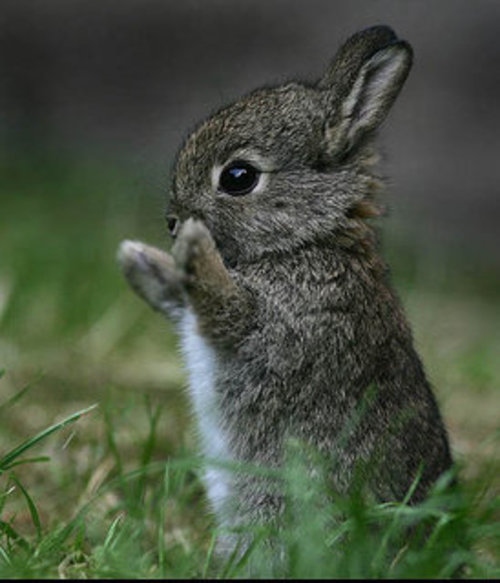

In [7]:
bunny2 = encodeImg('bunny2.jpg', net)
print bunny2
Image(filename='bunny2.jpg')

In [21]:
def print_overlap(a, b):
    print len(a & b), "/", max(len(a), len(b))

In [22]:
print_overlap(horse1, horse2)

6 / 20


In [23]:
print_overlap(bunny1, bunny2)

6 / 20


In [24]:
print_overlap(horse1, bunny1)

1 / 20


In [25]:
print_overlap(horse1, bunny2)

0 / 20


In [26]:
print_overlap(horse2, bunny1)

0 / 20


In [27]:
print_overlap(horse2, bunny2)

0 / 20
